# <font color="red">RA - Qiskit Practice - Lecture 01</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor

import numpy as np

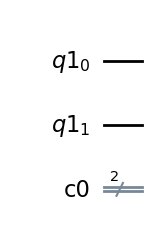

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc = QuantumCircuit(q, c)

display(qc.draw("mpl"))

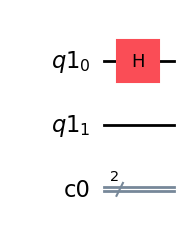

In [4]:
qc.h(0)
display(qc.draw("mpl"))

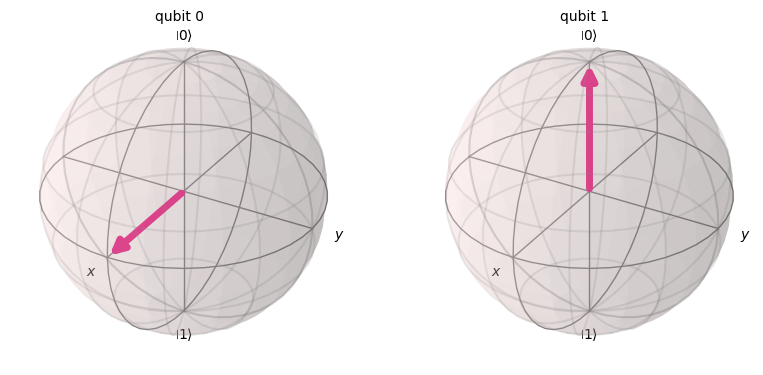

In [5]:
display(plot_bloch_multivector(qc))

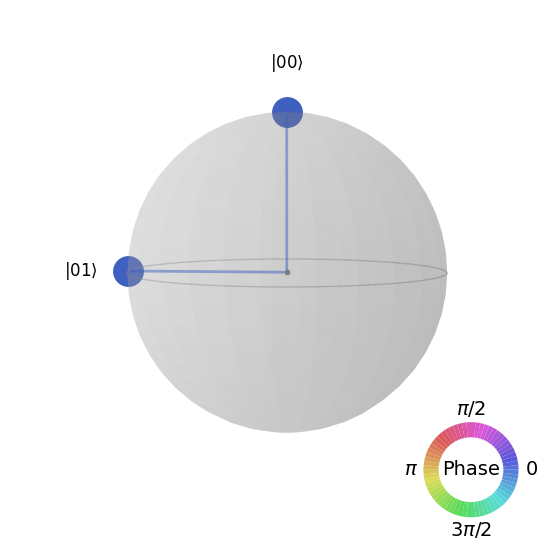

In [6]:
display(plot_state_qsphere(qc))

In [7]:
qc.initialize([1/np.sqrt(2), 1j/np.sqrt(2)], 1)

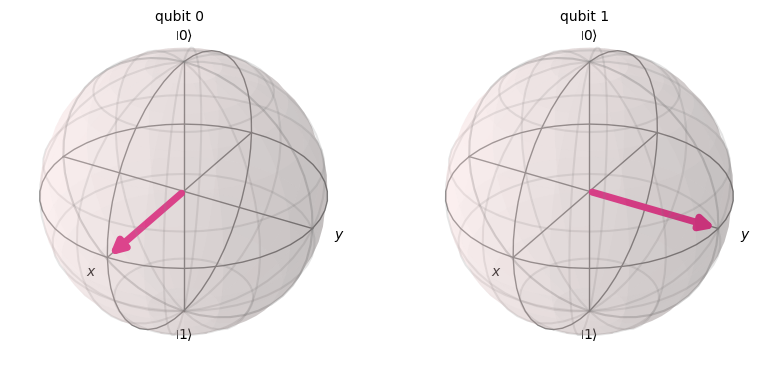

In [8]:
display(plot_bloch_multivector(qc))

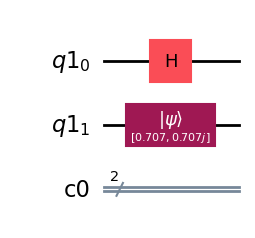

In [9]:
display(qc.draw("mpl"))

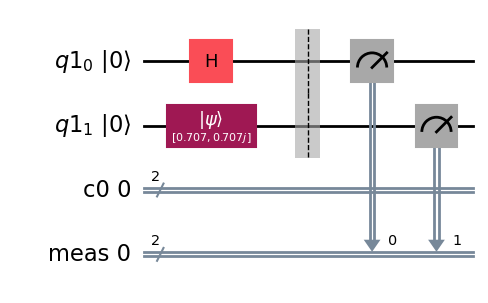

In [10]:
qc.measure_all()
qc.draw("mpl", initial_state=True)

In [17]:
simulator = AerSimulator()

transpile_qc = transpile(qc, simulator)
job = simulator.run(transpile_qc)

results = job.result()
counts = results.get_counts()

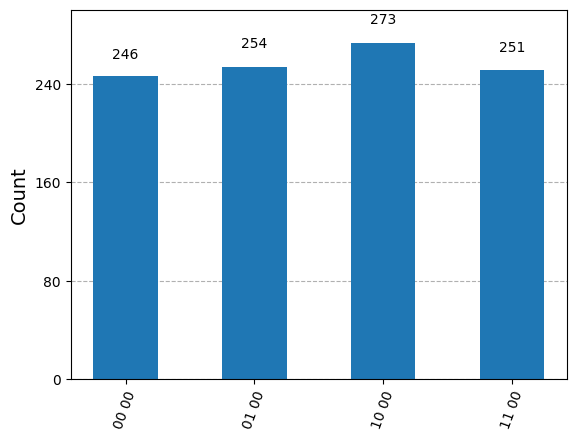

In [18]:
plot_histogram(counts)

In [22]:
from qiskit.circuit.library import HGate
hgate = HGate()
print(hgate.to_matrix())

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


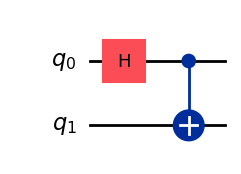

In [24]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0, 1)

qc2.draw("mpl")

In [29]:
from sympy import *
from sympy.physics.quantum import TensorProduct

id = Matrix([[1, 0], [0, 1]])
x = Matrix([[0, 1], [1, 0]])
zero = Matrix([[1, 0], [0, 0]])
one = Matrix([[0, 0], [0, 1]])

hgate = I * |0><0| + X * |1><1|

In [31]:
ccx2 = TensorProduct(id, zero) + TensorProduct(x, one)
ccx2

Matrix([
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, 1, 0, 0]])

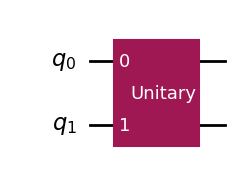

In [32]:
from qiskit.circuit.library import UnitaryGate

ccx2 = UnitaryGate(ccx2)

qc3 = QuantumCircuit(2)
qc3.append(ccx2, [0, 1])

qc3.draw("mpl")

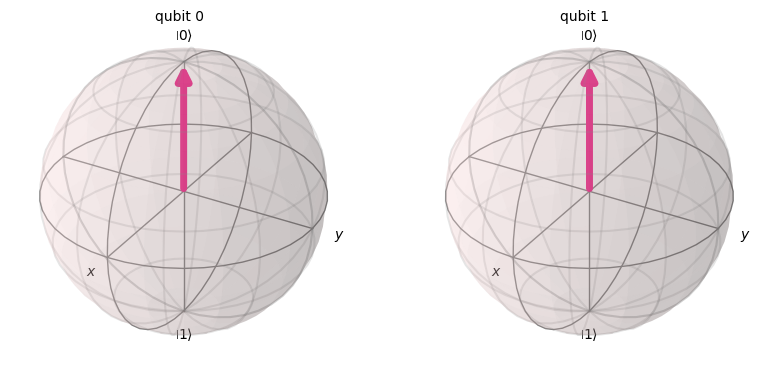

In [33]:
plot_bloch_multivector(qc3)